In [38]:
import pandas as pd

# Datei laden
file_path = "../data/fruit_data_cleaned.xlsx" 
data = pd.read_excel(file_path)

print(data.head())

print(data.info())

   Unnamed: 0 fruit_type         color   size     weight
0           0      grape        Yellow   Tiny   8.303385
1           1      apple          Pink  Large  80.976370
2           2     banana        Yellow  Large  74.615192
3           3      grape           Red   Tiny   6.924070
4           4     banana  Creamy White  Large  82.002542
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  198 non-null    int64  
 1   fruit_type  198 non-null    object 
 2   color       198 non-null    object 
 3   size        198 non-null    object 
 4   weight      198 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 7.9+ KB
None


In [39]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Kategoriale Features: One-Hot
categorical_features = ["color", "size"]
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(data[categorical_features])

# Numerische Features: Skalierung
scaler = StandardScaler()
scaled_weight = scaler.fit_transform(data[["weight"]])


In [40]:
# Daten kombinieren
X_prepared = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))
X_prepared["weight"] = scaled_weight
X_prepared["fruit_types"] = data["fruit_type"]  # Zielvariable 

In [41]:
from sklearn.model_selection import train_test_split

# Zielvariable und Features trennen
X = X_prepared.drop("fruit_types", axis=1)
y = X_prepared["fruit_types"]

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# logistic model trainieren
logistic_model = LogisticRegression(solver="lbfgs", random_state=47)
logistic_model.fit(X_train, y_train)


LogisticRegression(random_state=47)

In [43]:
# Vorhersagen
y_pred_logistic = logistic_model.predict(X_test)

# Ergebnis bewerten
print("Logistische Regression:")
print(classification_report(y_test, y_pred_logistic))

Logistische Regression:
              precision    recall  f1-score   support

       apple       0.86      0.92      0.89        13
      banana       0.89      0.80      0.84        10
       grape       1.00      1.00      1.00        17

    accuracy                           0.93        40
   macro avg       0.92      0.91      0.91        40
weighted avg       0.93      0.93      0.92        40



In [44]:
#Intepretation zur logistischen Regression
#Apple:
#Precision: 0.86, Recall: 0.92, F1-Score: 0.89.
#Das Modell erkennt Äpfel sehr gut und klassifiziert die meisten korrekt. 

#Banana:
#Precision: 0.89, Recall: 0.80, F1-Score: 0.84.
#Auch für Bananen zeigt das Modell eine gute Performance. 
#Recall ist etwas niedriger (0.80), was darauf hindeutet, dass einige Bananen fälschlicherweise anderen Klassen zugeordnet werden.

#Grape:
#Precision, Recall, und F1-Score sind alle perfekt (1.00).

#Gesamtleistung:
#Accuracy: 0.93. Das Modell klassifiziert 93% der Testdaten korrekt

In [45]:
from sklearn.tree import DecisionTreeClassifier

# Modell trainieren
tree_model = DecisionTreeClassifier(max_depth=5, random_state=47)
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=47)

In [46]:
# Vorhersagen
y_pred_tree = tree_model.predict(X_test)

# Ergebnis bewerten
print("Entscheidungsbaum:")
print(classification_report(y_test, y_pred_tree))

Entscheidungsbaum:
              precision    recall  f1-score   support

       apple       0.80      0.92      0.86        13
      banana       0.88      0.70      0.78        10
       grape       1.00      1.00      1.00        17

    accuracy                           0.90        40
   macro avg       0.89      0.87      0.88        40
weighted avg       0.90      0.90      0.90        40



In [47]:
#Interpretation Entscheidungsbaum 1
#Apple:
#Precision: 0.80, Recall: 0.92, F1-Score: 0.86.
#Der Entscheidungsbaum erkennt die meisten Äpfel korrekt, hat aber eine etwas geringere Precision im Vergleich zur logistischen Regression (0.86).

#Banana:
#Precision: 0.88, Recall: 0.70, F1-Score: 0.78.
#Das Modell hat Schwierigkeiten, Bananen richtig zuzuordnen (Recall 0.70). Es gibt Fälle, in denen Bananen anderen Klassen zugeordnet werden.

#Grape:
#Precision, Recall und F1-Score sind alle perfekt (1.00). 
#Genau wie bei der logistischen Regression erkennt der Entscheidungsbaum Trauben fehlerfrei.

#Accuracy: 0.90. Das Modell klassifiziert 90% der Beobachtungen korrekt, was leicht unter der Genauigkeit der logistischen Regression (0.93) liegt.



In [48]:
#Hyperparamtertuning Decision Tree

#Hyperparameter-Raum definieren: Wir testen verschiedene Kombinationen von Tiefe, Split-Kriterien und Mindestanzahl von Samples in Knoten.

#GridSearchCV: Automatisierte Suche nach der besten Kombination der Hyperparameter basierend auf der Genauigkeit (Accuracy).

#Kreuzvalidierung: Sorgt dafür, dass das Modell auf verschiedenen Splits des Trainingsdatensatzes getestet wird, um Überanpassung zu vermeiden.

#Bewertung: Nach dem Tuning wird das beste Modell auf den Testdaten evaluiert



from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Entscheidungsbaum-Modell
decision_tree = DecisionTreeClassifier(random_state=47)

# Hyperparameter-Raum definieren
param_grid = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "criterion": ["gini", "entropy"]
}

# GridSearchCV einrichten
grid_search = GridSearchCV(
    estimator=decision_tree,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,  # 5-fache Kreuzvalidierung
    verbose=1,  # Fortschritt anzeigen
    n_jobs=-1  # Mehrere Kerne verwenden
)

In [49]:
# Tuning durchführen
grid_search.fit(X_train, y_train)

# Beste Hyperparameter anzeigen
print("Beste Parameter:", grid_search.best_params_)
print("Beste Kreuzvalidierungs-Genauigkeit:", grid_search.best_score_)

# Optimiertes Modell vorhersagen und bewerten
best_tree = grid_search.best_estimator_
y_pred_tree = best_tree.predict(X_test)

from sklearn.metrics import classification_report
print("Entscheidungsbaum nach Tuning:")
print(classification_report(y_test, y_pred_tree))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Beste Parameter: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Beste Kreuzvalidierungs-Genauigkeit: 0.8735887096774194
Entscheidungsbaum nach Tuning:
              precision    recall  f1-score   support

       apple       0.86      0.92      0.89        13
      banana       0.89      0.80      0.84        10
       grape       1.00      1.00      1.00        17

    accuracy                           0.93        40
   macro avg       0.92      0.91      0.91        40
weighted avg       0.93      0.93      0.92        40



In [50]:

#Die Ergebnisse nach dem Hyperparameter-Tuning zeigen eine deutliche Verbesserung der Leistung des Entscheidungsbaums. 


#Metriken nach Tuning:
#Apple:

#Precision: 0.86, Recall: 0.92, F1-Score: 0.89.
#Apple wird nahezu genauso gut erkannt wie bei der logistischen Regression.

#Banana:

#Precision: 0.89, Recall: 0.80, F1-Score: 0.84.
#Der Recall für Bananen hat sich verbessert (von 0.70 auf 0.80).

#Grape:

#Perfekte Werte: Precision = 1.00, Recall = 1.00, F1-Score = 1.00.
#Trauben werden weiterhin ohne Fehler klassifiziert.

#Gesamtleistung:

#Accuracy: 0.93 (auf Testdaten).




In [51]:
#ROC-CURVE
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Logistische Regression: Wahrscheinlichkeiten
y_prob_logistic = logistic_model.predict_proba(X_test)

# Entscheidungsbaum: Wahrscheinlichkeiten
y_prob_tree = best_tree.predict_proba(X_test)

# Binarisieren der Zielvariable One-vs-Rest
y_test_bin = label_binarize(y_test, classes=["apple", "banana", "grape"])

# Durchschnittliche ROC-Kurve berechnen (micro-average)
fpr_logistic, tpr_logistic, _ = roc_curve(y_test_bin.ravel(), y_prob_logistic.ravel())
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

fpr_tree, tpr_tree, _ = roc_curve(y_test_bin.ravel(), y_prob_tree.ravel())
roc_auc_tree = auc(fpr_tree, tpr_tree)


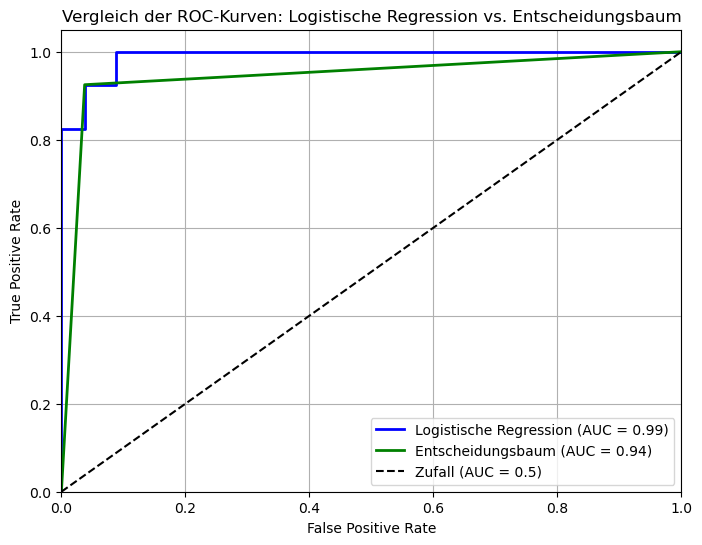

In [52]:
# Plotten
plt.figure(figsize=(8, 6))
plt.plot(fpr_logistic, tpr_logistic, color='blue', lw=2, label=f'Logistische Regression (AUC = {roc_auc_logistic:.2f})')
plt.plot(fpr_tree, tpr_tree, color='green', lw=2, label=f'Entscheidungsbaum (AUC = {roc_auc_tree:.2f})')

# Diagonale (Random Guessing)
plt.plot([0, 1], [0, 1], 'k--', label="Zufall (AUC = 0.5)")

# Plot-Details
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Vergleich der ROC-Kurven: Logistische Regression vs. Entscheidungsbaum")
plt.legend(loc="lower right")
plt.grid()
plt.show()